In [1]:
!wget  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

--2024-05-09 06:22:35--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2024-05-09 06:22:36--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc486015013c0e02eb84e906a5ce.dl.dropboxusercontent.com/cd/0/inline/CSgt0BTLkF1wPC8k8Go4ckohBgKSTQv9POLX33pQc2MZHe8WtFdng3tDEKxKwAlrtoQXu_LDhVRCi4PWApl2E3FAtRkgv9hoF1EE2pOMHX9NXiR6SzwkVli4Q4Kh7A3yu0ZhTqLrVXJ7WmfMzLGz8-ZF/file# [following]
--2024-05-09 06:22:36--  https://uc486015013c0e02eb84e906a5ce.dl.dropboxusercontent.com/cd/0/inline/CSgt0BTLkF1wPC8k8Go4ckohBgKSTQv9POLX33pQc2MZHe8WtFdng3tDEKxKwAlrtoQXu_LDhVRCi4PWApl2E3FAtRkgv9hoF1EE2pOMHX

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [3]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)
for layer in base_model.layers:
  layer.trainable=False
x=Flatten()(base_model.output)
x=Dense(units = 7, activation='softmax')(x)
model= Model(base_model.input,x)

17225924/17225924 [==============================] - 0s 0us/step


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [5]:
train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory="/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               )
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [6]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_data = val_datagen.flow_from_directory(directory="/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               )

Found 350 images belonging to 7 classes.


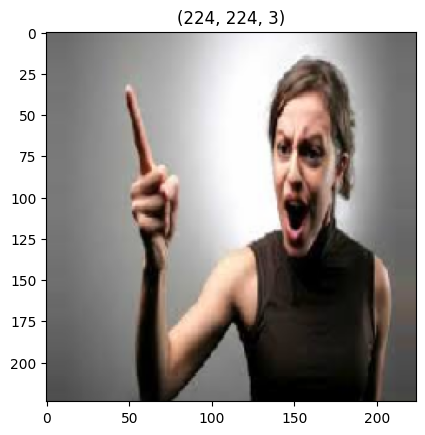

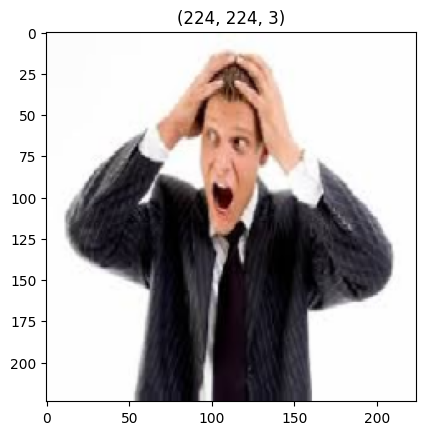

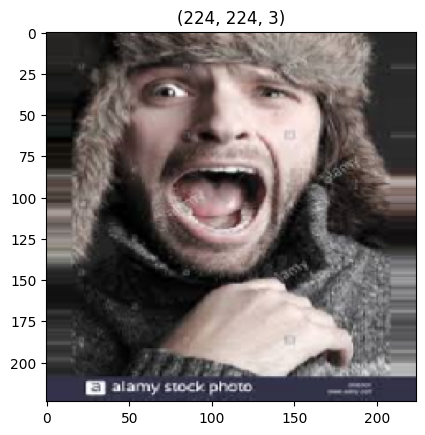

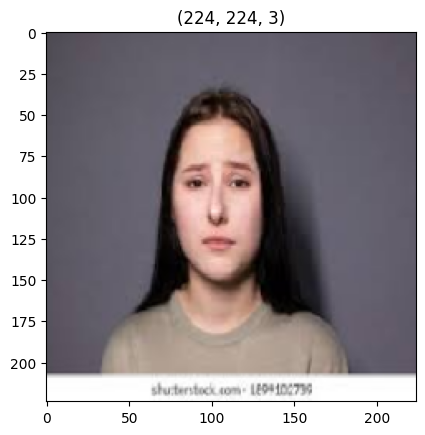

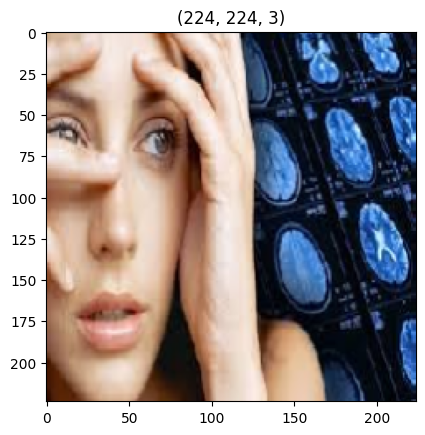

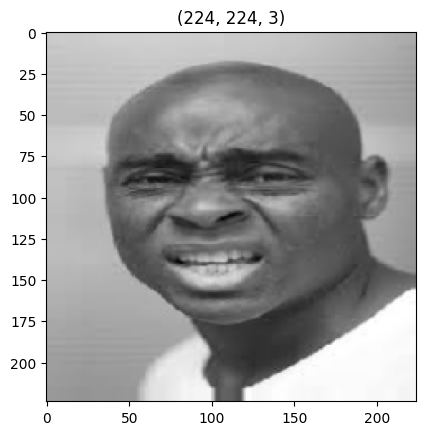

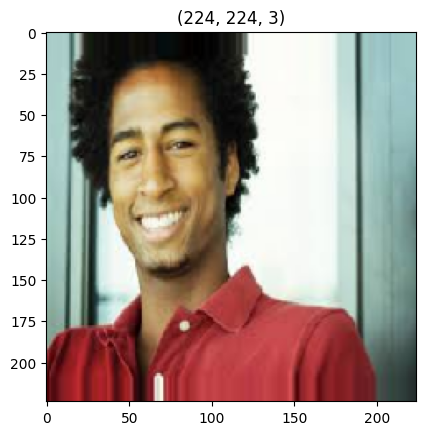

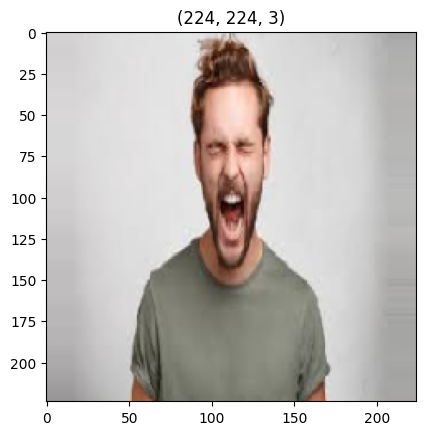

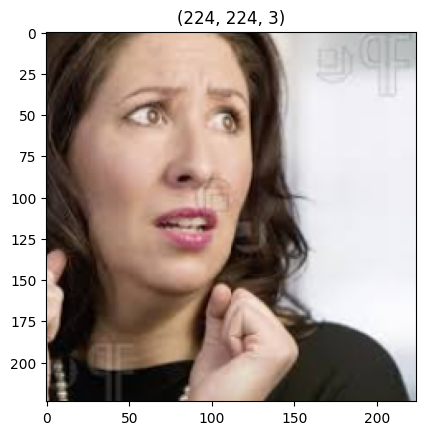

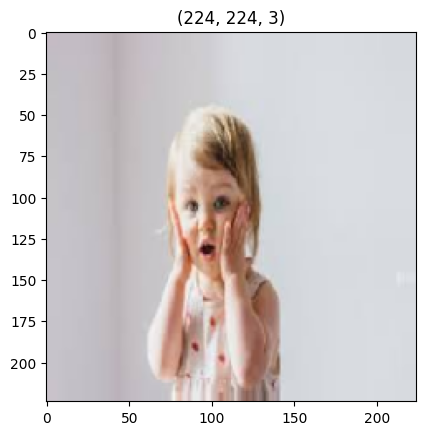

In [7]:
t_img , label = train_data.next()
def plotImages(img_arr,label):
  count = 0
  for im  , l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    count +=1
    if count ==10:
      break
plotImages(t_img , label)

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1,mode='auto')
mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back =[es , mc]

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
model.compile(optimizer ='Adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
hist = model.fit(train_data,
                 steps_per_epoch=10,
                 epochs=30,
                 validation_data=val_data,
                 validation_steps=8,
                 callbacks=[es, mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 10.4039 - accuracy: 0.1981
Epoch 1: val_accuracy improved from -inf to 0.55469, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 43s 4s/step - loss: 10.4039 - accuracy: 0.1981 - val_loss: 2.9344 - val_accuracy: 0.5547
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.2668 - accuracy: 0.5566
Epoch 2: val_accuracy improved from 0.55469 to 0.69531, saving model to best_model.h5
10/10 [==============================] - 30s 3s/step - loss: 3.2668 - accuracy: 0.5566 - val_loss: 2.2641 - val_accuracy: 0.6953
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.3265 - accuracy: 0.7484
Epoch 3: val_accuracy improved from 0.69531 to 0.86719, saving model to best_model.h5
10/10 [==============================] - 40s 4s/step - loss: 1.3265 - accuracy: 0.7484 - val_loss: 0.8229 - val_accuracy: 0.8672
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.8742
Epoch 4: val_accuracy improved from 0.86719 to 0.90625, saving model to best_model.h5
10/10 [==============================] - 40s 4s/step - loss: 0.5600 - ac

In [11]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [12]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

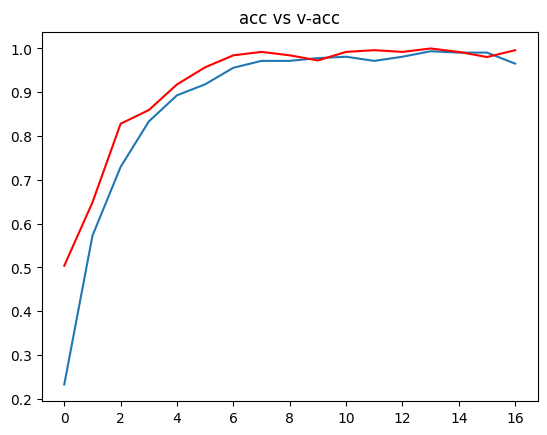

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = "red")
plt.title("acc vs v-acc")
plt.show()

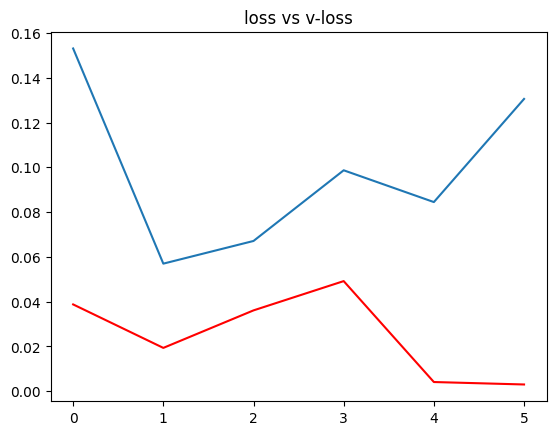

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c ="red")
plt.title("loss vs v-loss")
plt.show()

In [13]:
op = dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))

1/1 [==============================] - 1s 574ms/step
The image is of Fear


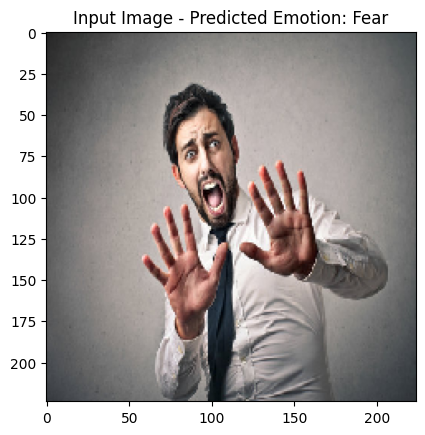

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = load_model("best_model.h5")

def predict_emotion(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    input_arr = np.array([img_array])

    # Make a prediction
    pred = model.predict(input_arr)
    pred_class = np.argmax(pred)

    # Assuming 'op' is a list or dict mapping class indices to emotion names
    emotion = op[pred_class]
    print(f"The image is of {emotion}")

    # Display the input image
    plt.figure(facecolor='white')
    plt.imshow(input_arr[0])
    plt.title(f"Input Image - Predicted Emotion: {emotion}")

    plt.show()

# Example usage
path = "/content/360_F_58004043_rbDdPitlYkmSpfPhpzQJA0dvEpECBsLt.jpg"
predict_emotion(path)

1/1 [==============================] - 0s 499ms/step
The image is of Angry


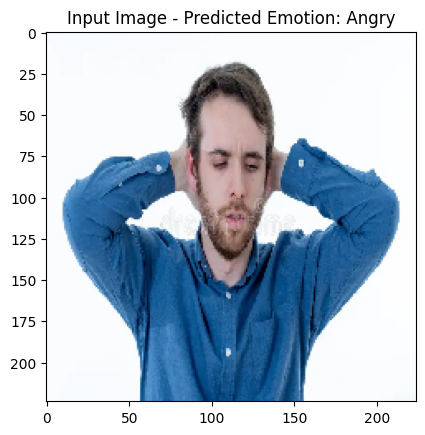

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = load_model("best_model.h5")

def predict_emotion(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    input_arr = np.array([img_array])

    # Make a prediction
    pred = model.predict(input_arr)
    pred_class = np.argmax(pred)

    # Assuming 'op' is a list or dict mapping class indices to emotion names
    emotion = op[pred_class]
    print(f"The image is of {emotion}")

    # Display the input image
    plt.figure(facecolor='white')
    plt.imshow(input_arr[0])
    plt.title(f"Input Image - Predicted Emotion: {emotion}")

    plt.show()

# Example usage
path = "/content/young-sad-man-suffering-depression-worried-concerned-hipster-looking-depressed-desperate-feeling-sorrow-portrait-154439373.webp"
predict_emotion(path)

1/1 [==============================] - 1s 1s/step
The image is of Disguist


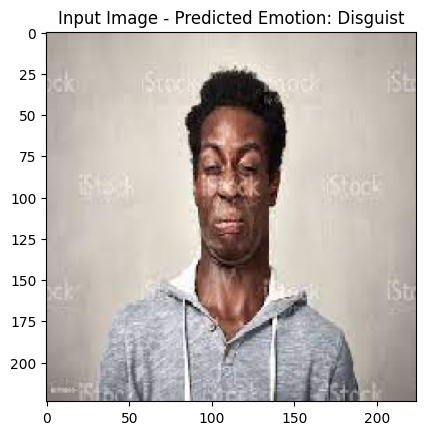

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = load_model("best_model.h5")

def predict_emotion(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    input_arr = np.array([img_array])

    # Make a prediction
    pred = model.predict(input_arr)
    pred_class = np.argmax(pred)

    # Assuming 'op' is a list or dict mapping class indices to emotion names
    emotion = op[pred_class]
    print(f"The image is of {emotion}")

    # Display the input image
    plt.figure(facecolor='white')
    plt.imshow(input_arr[0])
    plt.title(f"Input Image - Predicted Emotion: {emotion}")

    plt.show()

# Example usage
path = "/content/download (6).jpg"
predict_emotion(path)